<a href="https://colab.research.google.com/github/Krishnadayal/Data-Science-Project-Lifecycle/blob/main/Kernel_SVM_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
upload = files.upload()

Saving train_data to train_data


In [ ]:
train_data = pd.read_csv("/content/train_data")
train_data

,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_category
0,Kelaniya,1209.60,756.00,5292.00,4
1,Moratuwa,1590.12,1060.08,6007.12,1
2,Wattala,2288.88,1481.04,9155.52,4
3,Wattala,2274.94,1739.66,9099.76,4
4,Kelaniya,2345.49,2069.55,9243.99,4
...,...,...,...,...,...
774142,Gampaha,3893.40,3893.40,3448.44,3
774143,Katunayake,6095.86,5557.99,6275.15,3
774144,Colombo,5121.42,4820.16,4669.53,3
774145,Kandy,6311.76,6311.76,5940.48,3


In [ ]:
train_data.dtypes

,0
outlet_city,object
luxury_sales,float64
fresh_sales,float64
dry_sales,float64
cluster_category,int64


In [ ]:
train_data["cluster_category"] = train_data["cluster_category"].astype(str)

In [ ]:
train_data.dtypes

,0
outlet_city,object
luxury_sales,float64
fresh_sales,float64
dry_sales,float64
cluster_category,object


In [ ]:
!pip install category-encoders

from category_encoders import BinaryEncoder
encoder = BinaryEncoder(cols = ["outlet_city"])
train_data = encoder.fit_transform(train_data)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.9 MB/s eta 0:00:00


In [ ]:
x = train_data.iloc[:, :-1]
y = train_data.iloc[:, -1]

In [ ]:
print(x)

        outlet_city_0  outlet_city_1  outlet_city_2  outlet_city_3  \
0                   0              0              0              0   
1                   0              0              0              1   
2                   0              0              0              1   
3                   0              0              0              1   
4                   0              0              0              0   
...               ...            ...            ...            ...   
774142              0              1              1              1   
774143              1              0              0              0   
774144              0              1              1              0   
774145              1              0              1              0   
774146              1              0              0              1   

        outlet_city_4  luxury_sales  fresh_sales  dry_sales  
0                   1       1209.60       756.00    5292.00  
1                   0       1590.12

In [ ]:
print(y)

0         4
1         1
2         4
3         4
4         4
         ..
774142    3
774143    3
774144    3
774145    3
774146    3
Name: cluster_category, Length: 774147, dtype: object


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42, stratify = y)

In [ ]:
print(x_train)

        outlet_city_0  outlet_city_1  outlet_city_2  outlet_city_3  \
263764              0              0              1              1   
508573              0              1              1              1   
560987              0              1              1              0   
272884              0              0              1              1   
474074              1              0              0              1   
...               ...            ...            ...            ...   
310052              0              1              0              0   
218801              0              0              0              0   
374047              0              1              0              1   
181290              0              0              1              1   
622573              1              0              0              1   

        outlet_city_4  luxury_sales  fresh_sales  dry_sales  
263764              0        800.10      3771.90     914.40  
508573              1       1223.04

In [ ]:
print(x_test)

        outlet_city_0  outlet_city_1  outlet_city_2  outlet_city_3  \
98095               0              0              0              1   
358834              0              0              1              1   
399527              0              1              1              0   
709938              0              1              1              1   
406558              1              0              1              0   
...               ...            ...            ...            ...   
636425              1              0              0              0   
623539              1              0              1              0   
421823              0              1              0              1   
275317              0              0              1              1   
144992              0              0              1              0   

        outlet_city_4  luxury_sales  fresh_sales  dry_sales  
98095               0       2544.12      1413.40    9611.12  
358834              1       3920.40

In [ ]:
print(y_train)

263764    2
508573    1
560987    6
272884    2
474074    1
         ..
310052    2
218801    2
374047    1
181290    2
622573    6
Name: cluster_category, Length: 580610, dtype: object


In [ ]:
print(y_test)

98095     4
358834    5
399527    1
709938    6
406558    1
         ..
636425    6
623539    6
421823    1
275317    2
144992    4
Name: cluster_category, Length: 193537, dtype: object


In [ ]:
from sklearn.preprocessing import RobustScaler
rc = RobustScaler()
x_train.iloc[:,5:8] = rc.fit_transform(x_train.iloc[:,5:8])
x_test.iloc[:,5:8] = rc.transform(x_test.iloc[:,5:8])

In [ ]:
print(x_train)

        outlet_city_0  outlet_city_1  outlet_city_2  outlet_city_3  \
263764              0              0              1              1   
508573              0              1              1              1   
560987              0              1              1              0   
272884              0              0              1              1   
474074              1              0              0              1   
...               ...            ...            ...            ...   
310052              0              1              0              0   
218801              0              0              0              0   
374047              0              1              0              1   
181290              0              0              1              1   
622573              1              0              0              1   

        outlet_city_4  luxury_sales  fresh_sales  dry_sales  
263764              0     -0.813311     0.082479  -0.523285  
508573              1     -0.437498

In [ ]:
print(x_test)

        outlet_city_0  outlet_city_1  outlet_city_2  outlet_city_3  \
98095               0              0              0              1   
358834              0              0              1              1   
399527              0              1              1              0   
709938              0              1              1              1   
406558              1              0              1              0   
...               ...            ...            ...            ...   
636425              1              0              0              0   
623539              1              0              1              0   
421823              0              1              0              1   
275317              0              0              1              1   
144992              0              0              1              0   

        outlet_city_4  luxury_sales  fresh_sales  dry_sales  
98095               0      0.736378    -0.384952   1.094494  
358834              1      1.959303

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = "rbf", C = 0.5, gamma = 0.01)
classifier.fit(x_train, y_train)

SVC(C=0.5, gamma=0.01)

In [ ]:
y_pred = classifier.predict(x_test)
comparision = pd.DataFrame({"Actual Cluster Category":y_test, "Predicted Cluster Category": y_pred})
comparision.head(10)

,Actual Cluster Category,Predicted Cluster Category
98095,4,4
358834,5,5
399527,1,1
709938,6,6
406558,1,1
565563,6,6
506409,1,1
528118,1,1
165640,4,4
519445,1,1


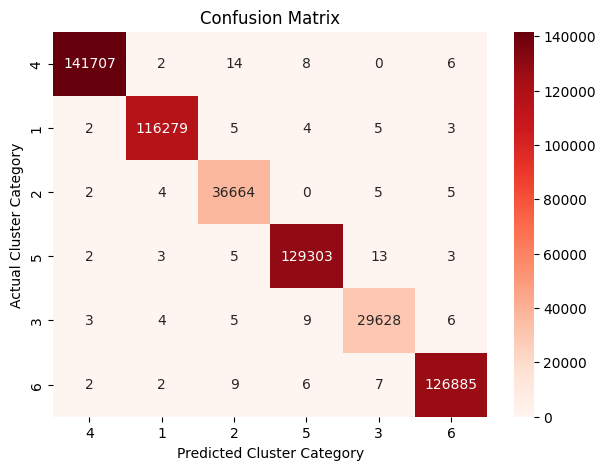

KNN Train Model Accuracy: 0.9997519849813128


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
x_pred = classifier.predict(x_train)

cm_train = confusion_matrix(y_train, x_pred)
labels = train_data["cluster_category"].unique()

plt.figure(figsize = (7,5))
sns.heatmap(cm_train, annot = True, fmt = "d", cmap = "Reds", xticklabels = labels, yticklabels = labels)
plt.xlabel("Predicted Cluster Category")
plt.ylabel("Actual Cluster Category")
plt.title("Confusion Matrix")
plt.show()

print(f"KNN Train Model Accuracy: {accuracy_score(y_train, x_pred)}")

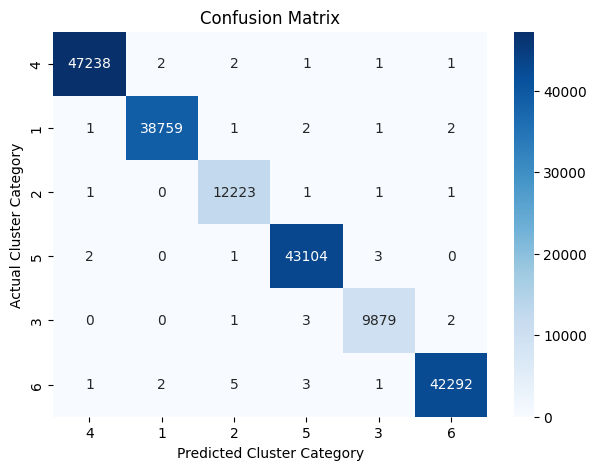

KNN Test Model Accuracy: 0.9997829872324155


In [ ]:
cm_test = confusion_matrix(y_test, y_pred)
labels = train_data["cluster_category"].unique()

plt.figure(figsize = (7,5))
sns.heatmap(cm_test, annot = True, fmt = "d", cmap = "Blues", xticklabels = labels, yticklabels = labels)
plt.xlabel("Predicted Cluster Category")
plt.ylabel("Actual Cluster Category")
plt.title("Confusion Matrix")
plt.show()

print(f"KNN Test Model Accuracy: {accuracy_score(y_test, y_pred)}")

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)

print("Accuracy: {:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f}%".format(accuracies.std()*100))
print("Total Error: {:.2f}%".format((1 - accuracies).mean()*100))

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=classifier,
                                                        X = x_train, y = y_train, cv = 5,
                                                        scoring = 'accuracy',
                                                        train_sizes = np.linspace(0.1, 1.0, 10),
                                                        n_jobs = -1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color = 'blue', marker = 'o', markersize = 5, label = 'Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha = 0.15, color = 'blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize = 5, label = 'Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha = 0.15, color = 'green')
plt.grid()
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend(loc = 'lower right')
plt.show()

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator = classifier, X = x_train,
                                                        y = y_train, cv = 5, scoring = 'neg_log_loss',
                                                        train_sizes = np.linspace(0.1, 1.0, 10),
                                                        n_jobs = -1)

train_mean = -np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
test_mean = -np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

plt.plot(train_sizes, train_mean, color = 'blue', marker = 'o', markersize = 5, label = 'Training Loss')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha = 0.15, color = 'blue')
plt.plot(train_sizes, test_mean, color = 'green', linestyle = '--', marker = 's', markersize = 5, label = 'Validation Loss')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha = 0.15, color = 'green')

plt.grid()
plt.xlabel('Number of Training Samples')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend(loc = 'upper right')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
hyper_parameters = [{"C":[0.25, 0.5, 0.75, 1, 1.5],"kernel":["linear"]},
                    {"C":[0.25, 0.5, 0.75, 1, 1.5],"kernel":["rbf","poly"],
                    "gamma":[0.1,0.3,0.5,0.7,0.9]}]

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = hyper_parameters,
                           scoring = "accuracy",
                           cv = 10)

grid_search.fit(x_train,y_train)
best_accuracy = grid_search.best_score_
best_hyper_parameters = grid_search.best_params_

print(f"Best Accuracy: {best_accuracy}")
print(f"Best Hyper Parameters: {best_hyper_parameters}")

NameError: name 'classifier' is not defined

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     47248
           2       0.99      1.00      1.00     38755
           3       0.65      0.58      0.61     12128
           4       0.99      1.00      1.00     42926
           5       0.54      0.62      0.58      9885
           6       1.00      0.99      1.00     42596

    accuracy                           0.95    193538
   macro avg       0.86      0.86      0.86    193538
weighted avg       0.95      0.95      0.95    193538



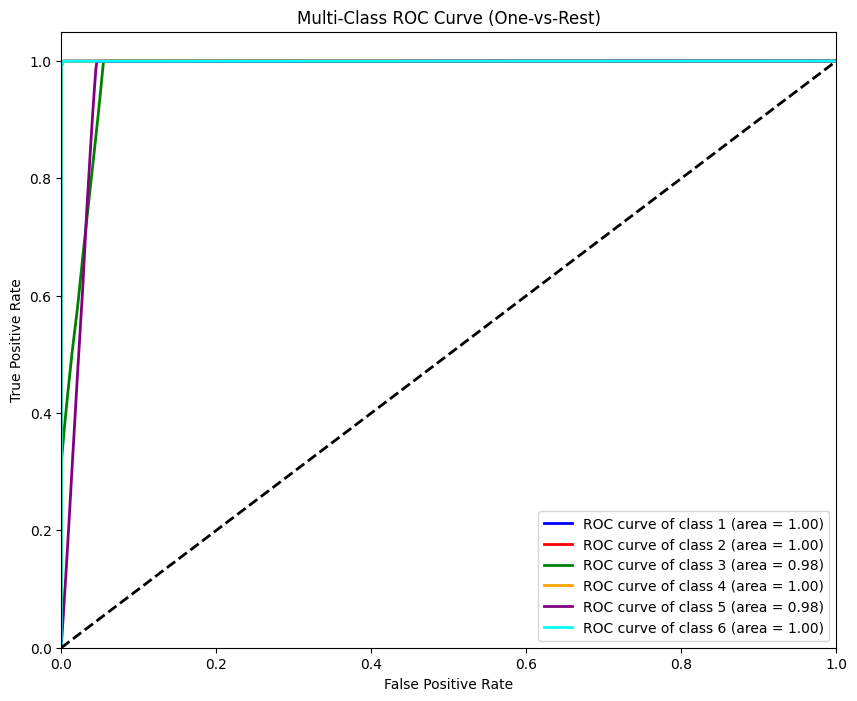

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import RocCurveDisplay, roc_curve, auc

# Binarize the target labels
y_test_bin = label_binarize(y_test, classes=classifier.classes_)
n_classes = y_test_bin.shape[1]

# Create an OneVsRestClassifier
classifier_ovr = OneVsRestClassifier(classifier)
classifier_ovr.fit(x_train, y_train)

# Predict probabilities for each class
y_score = classifier_ovr.predict_proba(x_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(7, 5))
colors = ['blue', 'red', 'green', 'orange', 'purple', 'cyan']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color = color, lw=2,
             label = 'ROC curve of class {0} (area = {1:0.2f})'
             ''.format(classifier.classes_[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw = 2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve (One-vs-Rest)')
plt.legend(loc = "lower right")
plt.show()